In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt


In [2]:
#Reading the whole Dataset
Data= pd.read_csv('AOV.csv')

In [3]:
Data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [13]:
#Checking Information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
Revenue           5000 non-null int64
dtypes: int64(6), object(2)
memory usage: 312.6+ KB


In [15]:
Data.describe()

,order_id,shop_id,user_id,order_amount,total_items,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,4.789051e+06
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,8.196821e+07
min,1.000000,1.000000,607.000000,90.000000,1.00000,9.000000e+01
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,1.630000e+02
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,5.680000e+02
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,1.161000e+03
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,1.408000e+09


**The describe() function we used also gave us some valuable information to better understand 
this data aside from the mean and standard deviation. We can see the minimum value is 90 and max value is 704,000.**
We can also see the values for the median and first and third quartile.
Comparing these numbers, we can see that the maximum value is much higher than the other values. 
Considering our dataset has 5000 records, 
there are probably a few outlier values that are incredibly high dragging up the mean.

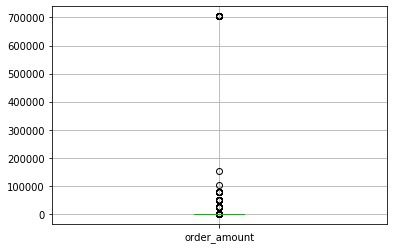

In [28]:
Data.boxplot(column='order_amount')

To get a sense of the distribution, we can look at a box plot of the data.
The entire box portion of the box plot is a line along 0! It looks like there are lots of outliers. Let's try finding them by grouping the data by order amount, counting the number of entries for each group, and sort it in descending order.





In [16]:
# To determine Average Order Value (AOV)

# First determine respective sums of both 'order_amount' and 'total_items'
oa_sum = Data['order_amount'].sum()
ti_sum = Data['total_items'].sum()
print(oa_sum)
print(ti_sum)

15725640
43936


In [17]:
# Then calculate average by dividing the total order amount (oa_sum) by the total items amount (ti_sum)
AOV = oa_sum/ti_sum
AOV

In [18]:

# Print Average Order Value (AOV) with only 2 decimal places and the dollar sign
print("%.2f" % AOV)

357.92


In [19]:
# Print correct explanation with $
'${:,.2f}'.format(AOV)


'$357.92'

In [23]:
#Possible naive calculations
# Incorrect calculation explained as a mistaken count() instead of sum() function
oa_sum = Data['order_amount'].sum()
ti_count = Data['total_items'].count()
AOV = oa_sum/ti_count
print(AOV)

3145.128


In [60]:
#Best Metric Model
#The best metric Model is using .sum() instead of.count()

#However,


#Since they were selling Sneakers
#We can say that any order higher than 1000 is more of a business to business venture

B2Bprice =0.0
B2Cprice = 0.0
B2Borders =0.0
B2Corders = 0.0
value = Data['order_amount']
quantity = Data['total_items']
for i, j in zip(value,quantity):


    if (j > 1000): #this is to differentiate between the two cases
        B2Bprice += i
        B2Borders += 1
    else:
        B2Cprice += i
        B2Corders += 1

print("AOV of B2B is " , (B2Bprice / B2Borders))
print("AOV of B2C is " , (B2Cprice / B2Corders))

AOV of B2B is  704000.0
AOV of B2C is  754.0919125025085


**AOV the average order value is caluclated as the total revenue divided by the #orders.**
Businesses usally requesting in thousands and normal clients requesting in under a dozen.

After splitting the data into B2B and B2C, I have calculated the AOV for both and got the following results:

Business to Business

Business to Consumers


('AOV of B2B is  704000.0) 
    
('AOV of B2C is 754.0919125025085)

Seems more reasonable for B2C now.


